# Air Passenger Time Series Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dell\Downloads\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [4]:
df.nunique()

Month          144
#Passengers    118
dtype: int64

In [5]:
df.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
df["Month"]=pd.to_datetime(df["Month"])
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
df.set_index('Month',inplace=True)

<AxesSubplot:xlabel='Month'>

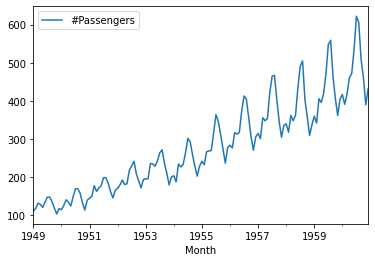

In [9]:
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(df["#Passengers"])

In [12]:
def adfuller_test(Month):
    result=adfuller(Month)
    labels=['ADf test statistic','p-value','#lage used','number of observation used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence zgainst the null hypothsis(ho), reject the null hypothsis.data has not stationary")
    else:
        print("weak evidence against numm hypothsis")
        

In [13]:
adfuller_test(df["#Passengers"])

ADf test statistic : 0.8153688792060502
p-value : 0.991880243437641
#lage used : 13
number of observation used : 130
weak evidence against numm hypothsis


In [14]:
df['passenger first difference']=df["#Passengers"]-df["#Passengers"].shift(1)

In [15]:
df['seasonal first difference']=df["#Passengers"]-df["#Passengers"].shift(12)

In [16]:
df.head(14)

,#Passengers,passenger first difference,seasonal first difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


In [17]:
adfuller_test((df['seasonal first difference']).dropna())

ADf test statistic : -3.3830207264924805
p-value : 0.011551493085514982
#lage used : 1
number of observation used : 130
strong evidence zgainst the null hypothsis(ho), reject the null hypothsis.data has not stationary


<AxesSubplot:xlabel='Month'>

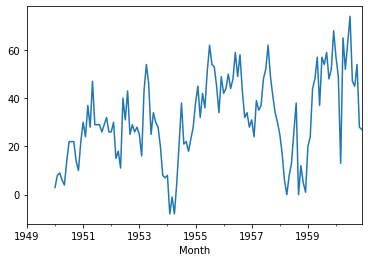

In [18]:
df['seasonal first difference'].plot()

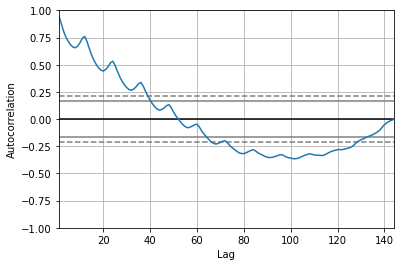

In [19]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['#Passengers'])
plt.show()

In [20]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

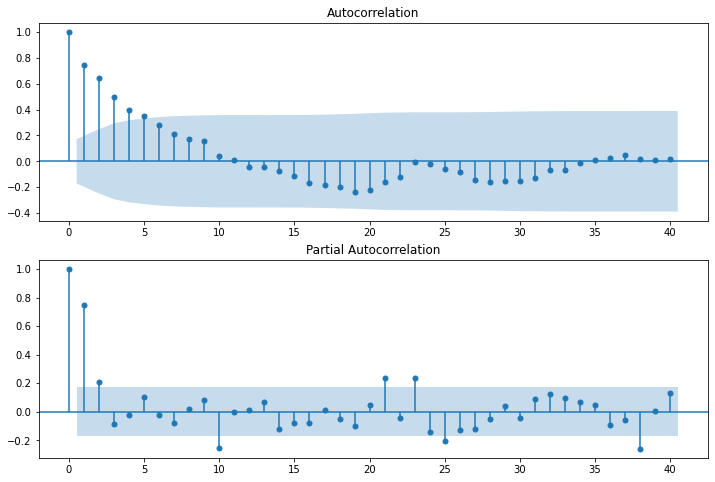

In [21]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df['seasonal first difference'].iloc[13:],lags=40,ax=ax2)

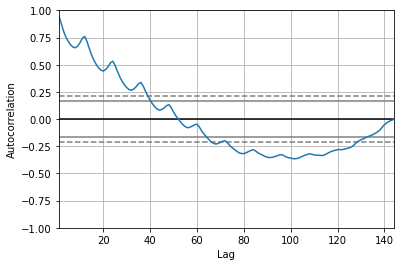

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df["#Passengers"])
plt.show()

In [23]:
from statsmodels.tsa.arima_model import ARIMA

In [24]:
model=ARIMA(df['#Passengers'],order=(1,1,1))
model_fit=model.fit()
model_fit

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

In [25]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -697.073
Method:                       css-mle   S.D. of innovations             31.338
Date:                Sun, 08 May 2022   AIC                           1402.145
Time:                        21:44:55   BIC                           1413.997
Sample:                    02-01-1949   HQIC                          1406.961
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6112      0.228     11.435      0.000       2.164       3.059
ar.L1.D.#Passengers     0.7400      0.058     12.778      0.000       0.626       0.854
ma.L1.D.#Passengers    -1.0000      0.019    -53.425      0.000      -1.037      -0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3514           +0.0000j            1.3514            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Month'>

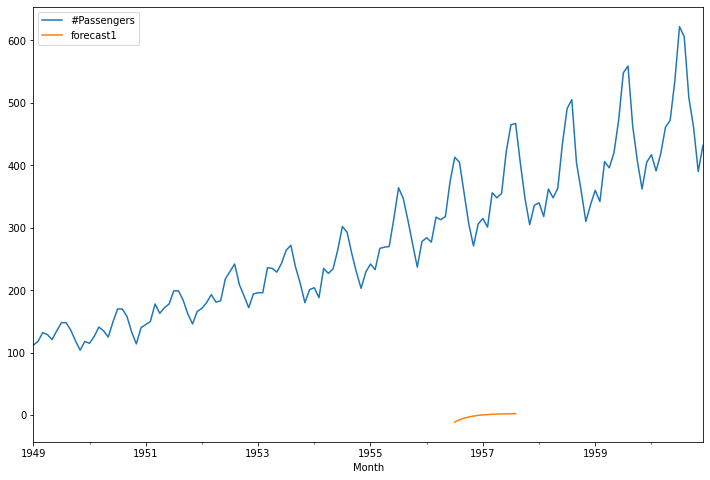

In [26]:
df["forecast1"]=model_fit.predict(start=90,end=103,dynamic=True)
df[["#Passengers","forecast1"]].plot(figsize=(12,8))

In [27]:
import statsmodels.api as sm

In [28]:
model=sm.tsa.statespace.SARIMAX(df["#Passengers"],order=(1,1,1),seasonal_order=(1,1,1,12))
result=model.fit()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

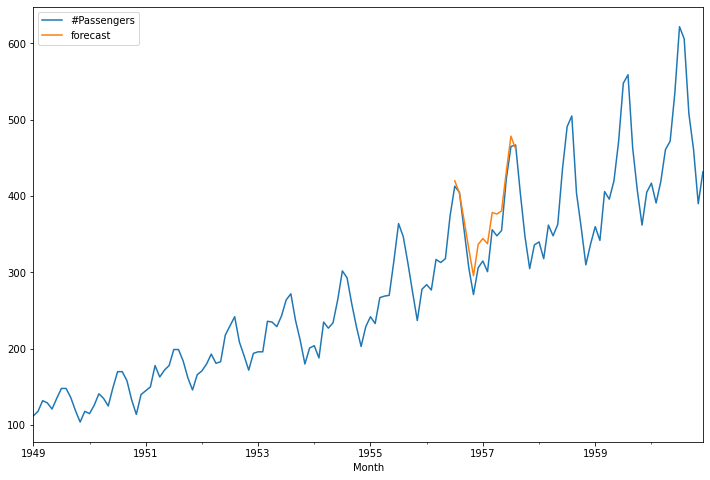

In [29]:
df["forecast"]=result.predict(start=90,end=103,dynamic=True)
df[["#Passengers","forecast"]].plot(figsize=(12,8))

In [30]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset("Month" ==x) for x in range(0,24)]

In [31]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [32]:
future_datest_df.tail()

,#Passengers,passenger first difference,seasonal first difference,forecast1,forecast
1960-12-01,NaN,NaN,NaN,NaN,NaN
1960-12-01,NaN,NaN,NaN,NaN,NaN
1960-12-01,NaN,NaN,NaN,NaN,NaN
1960-12-01,NaN,NaN,NaN,NaN,NaN
1960-12-01,NaN,NaN,NaN,NaN,NaN


In [33]:
future_df=pd.concat([df,future_datest_df])


<AxesSubplot:>

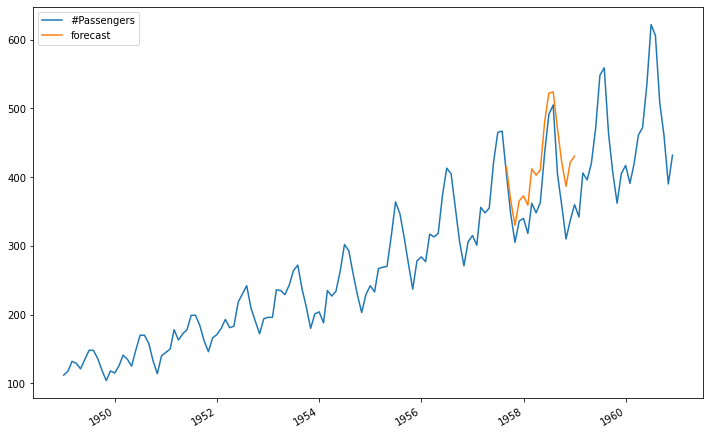

In [34]:
future_df['forecast']=result.predict(start=104, end=120,dynamic=True)
future_df[['#Passengers','forecast']].plot(figsize=(12,8))